# 455. Assign Cookies
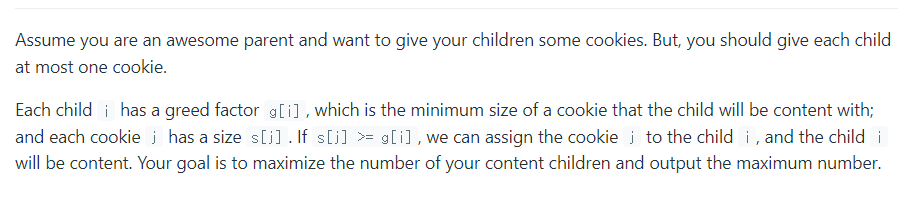
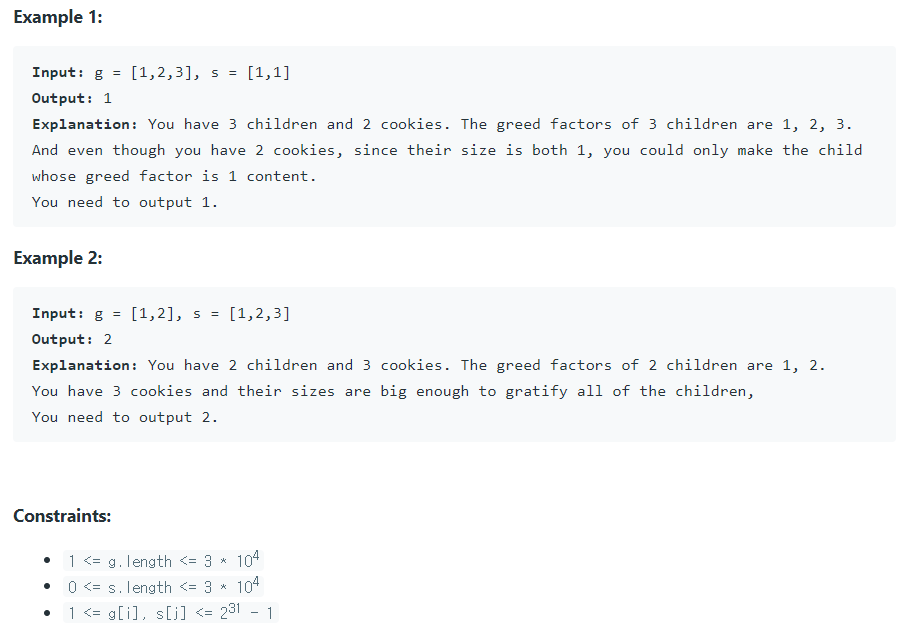

- `핵심 포인트`: 아이가 최소한으로 원하는 쿠키의 크기보다 실제 쿠키의 크기가 크거나 작을 때 쿠키 먹은 아이의 수가 늘어난다.
- `방법`: 오름차순으로 둘 다 정렬해놓은 후, 하나씩 비교한다. > for문 2개

In [19]:
class Solution(object):
    def findContentChildren(self, g, s):
        """
        :type g: List[int]
        :type s: List[int]
        :rtype: int
        """
        # 비교를 위해 오름차순으로 greed factor와 쿠키의 크기를 정렬한다.
        # greed factor가 작은 아이가 큰 쿠키를 먹는 것은 가능하나, 
        # greed factor가 작은 아이가 먹을 수 있는 쿠키 범위 내에서 최대한 쿠키의 크기가 작아야
        # 최대한 많은 아이가 쿠키를 먹을 수 있기 때문에 정렬한다.
        g.sort()
        s.sort()
        count = 0
        for greed in g:
            for size in s:
                # 각 아이의 greed factor보다 쿠키의 크기가 크다면
                if size >= greed:
                    # 아이가 쿠키를 먹어버리기 때문에 s 리스트에서 그 쿠키를 제거한다.
                    s.remove(size)
                    count += 1
                    break
        return count

In [20]:
s=Solution()
s.findContentChildren(g = [1,2,3], s = [1,1])

1

In [21]:
s=Solution()
s.findContentChildren(g = [1,2], s = [1,2,3])

2

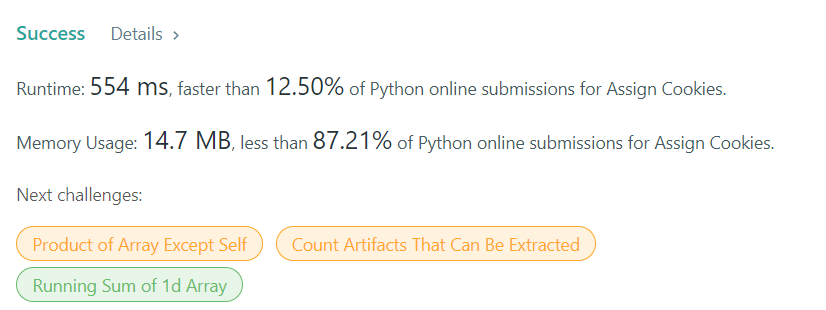

- 리스트를 변형시키지 않는 풀이도 생각해보자.
- `이유1`: 이 문제 푸는 데에는 리스트를 삭제해도 상관이없으나, 리스트를 바꿔주면 메모리 사용량이 늘어난다.
- `이유2`: 리스트를 보존해야할 경우도 생각해볼 수 있다.
- `핵심 포인트`: 쿠키를 제거하는 대신에 for문을 도는 범위를 바꿔주면 되지 않을까?

In [23]:
class Solution(object):
    def findContentChildren(self, g, s):
        """
        :type g: List[int]
        :type s: List[int]
        :rtype: int
        """
        s.sort()
        g.sort()
        
        count = 0
        next_cookie = 0
        
        for greed in range(len(g)):
            for size in range(next_cookie, len(s)):
                if s[size] >= g[greed]:
                    count += 1
                    next_cookie += 1
                    break
        return count
       

In [13]:
s=Solution()
s.findContentChildren(g = [1,2,3], s = [1,1])

1

In [14]:
s=Solution()
s.findContentChildren(g = [1,2], s = [1,2,3])

2

- `실패 이유 추정`: 아래의 경우와 같은 경우에 index를 하나 증가시키는 것이 아닌, 현재 쿠키의 index보다 하나 큰 index로 바꿔줘야 한다. 물론 아래의 경우에는 답이 나오지만, 더 복잡한 경우에는 답이 안나올 것이다.
- `수정 부분`: index라는 새로운 변수를 만들어서 index에 현재 쿠키 size보다 1 큰 index값을 대입해준다.
- 아래의 부분에서 g=2일 때 s는 2인 쿠키를 먹을텐데, 이때의 s의 index범위가 2가 아닌 3으로 바뀐다.

In [24]:
s=Solution()
s.findContentChildren(g = [1,2,3], s = [1, 1, 2, 3])

3

In [15]:
class Solution(object):
    def findContentChildren(self, g, s):
        """
        :type g: List[int]
        :type s: List[int]
        :rtype: int
        """
        s.sort()
        g.sort()
        
        count = 0
        next_cookie = 0
        
        for greed in range(len(g)):   
            for size in range(next_cookie, len(s)):
                if s[size] >= g[greed]:
                    count += 1
                    # 수정한 부분 next_cookie+= 1 대신 현재의 next_cookie = size+1로 변경
                    next_cookie = size+1
                    break
        return count

In [16]:
s=Solution()
s.findContentChildren(g = [1,2,3], s = [1,1])

1

In [17]:
s=Solution()
s.findContentChildren(g = [1,2], s = [1,2,3])

2

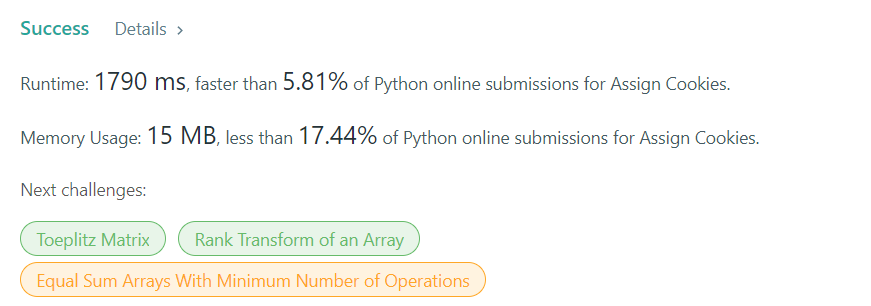